In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df=df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

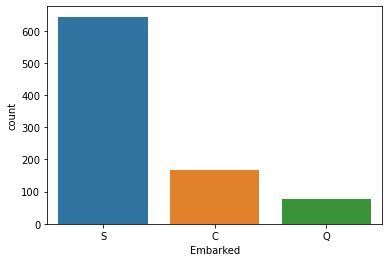

In [114]:
sns.countplot(x='Embarked',data=df)

In [115]:
df['Embarked']=df['Embarked'].fillna('S')

In [116]:

mean = df["Age"].mean()
df["Age"]=df.Age.fillna(mean)
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [119]:
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)

In [120]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [121]:
ports={"S":0,"C":1,"Q":2}
df['Embarked']=df['Embarked'].map(ports)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,0
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,1


In [122]:
X=df.values
y=df['Survived'].values
X=np.delete(X,0,axis=1)
print(X.shape)
print(y.shape)

(891, 7)
(891,)


In [123]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)
print(X)

(891, 8)
[[ 1.      3.      0.     ...  0.      7.25    0.    ]
 [ 1.      1.      1.     ...  0.     71.2833  1.    ]
 [ 1.      3.      1.     ...  0.      7.925   0.    ]
 ...
 [ 1.      3.      1.     ...  2.     23.45    0.    ]
 [ 1.      1.      0.     ...  0.     30.      1.    ]
 [ 1.      3.      0.     ...  0.      7.75    2.    ]]


# Logistic Regression Implementation

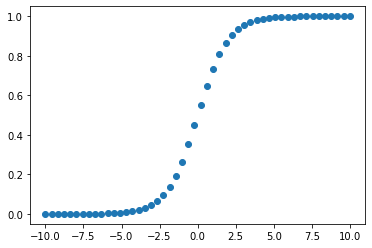

In [124]:
# Defining the sigmoid function
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
    
a=np.linspace(-10,10,50)
plt.scatter(a,sigmoid(a))

In [125]:
def hypothesis(X,theta):
    """
    X - entire array(m,n+1)
    theta - np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def cost_function(X,y,theta):
    """
    X - (m,n+1)
    Y - (m,1)
    theta - (n+1,1)

    returns 
     value of cost function
    """
    hi=hypothesis(X,theta)
    E=-1.0*np.mean( y*np.log(hi) + ((1-y)*np.log(1-hi)) )
    return E

In [126]:
def gradient(X,y,theta):
    """
    params:
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)

    returns
    gradient vector - (n+1,1)
    """
    hi=hypothesis(X,theta)
    grad=-1.0 * np.dot(X.T,y-hi)
    m=X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.000001,max_itr=500):
    n=X.shape[1]
    theta = np.zeros((n,1))
    error_list=[]
    for i in range(max_itr):
        err = cost_function(X,y,theta)
        error_list.append(err)

        grad=gradient(X,y,theta)
        theta=theta - lr*grad
    return theta,error_list

# Train-Validation-Testing !!!

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(["Survived"],axis=1).to_numpy()
y=df.Survived.to_numpy()

scaler=StandardScaler()
scaler.fit(X)
x1=scaler.transform(X)
print(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)


[[ 3.          0.         22.         ...  0.          7.25
   0.        ]
 [ 1.          1.         38.         ...  0.         71.2833
   1.        ]
 [ 3.          1.         26.         ...  0.          7.925
   0.        ]
 ...
 [ 3.          1.         29.69911765 ...  2.         23.45
   0.        ]
 [ 1.          0.         26.         ...  0.         30.
   1.        ]
 [ 3.          0.         32.         ...  0.          7.75
   2.        ]]
(712, 7)
(712,)
(179, 7)
(179, 7)


In [128]:
ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))
print(x_train)
print(x_train.shape)

[[ 1.      3.      1.     ...  2.     15.2458  1.    ]
 [ 1.      2.      0.     ...  0.     10.5     0.    ]
 [ 1.      2.      0.     ...  1.     37.0042  1.    ]
 ...
 [ 1.      3.      0.     ...  0.      7.7333  2.    ]
 [ 1.      3.      1.     ...  0.     17.4     0.    ]
 [ 1.      2.      0.     ...  1.     39.      0.    ]]
(712, 8)


In [129]:
theta,error_list=gradient_descent(x_train,y_train)

<ipython-input-124-1d96f954ccef>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-x))
<ipython-input-125-c96767712320>:18: RuntimeWarning: divide by zero encountered in log
  E=-1.0*np.mean( y*np.log(hi) + ((1-y)*np.log(1-hi)) )
<ipython-input-125-c96767712320>:18: RuntimeWarning: invalid value encountered in multiply
  E=-1.0*np.mean( y*np.log(hi) + ((1-y)*np.log(1-hi)) )


In [130]:
k=1
for i in error_list:
    print(f"Cost at {k}th iteration is  {i}")
    k+=1

Cost at 1th iteration is  0.6931471805599452
Cost at 2th iteration is  nan
Cost at 3th iteration is  nan
Cost at 4th iteration is  nan
Cost at 5th iteration is  nan
Cost at 6th iteration is  nan
Cost at 7th iteration is  nan
Cost at 8th iteration is  nan
Cost at 9th iteration is  nan
Cost at 10th iteration is  nan
Cost at 11th iteration is  nan
Cost at 12th iteration is  nan
Cost at 13th iteration is  nan
Cost at 14th iteration is  nan
Cost at 15th iteration is  nan
Cost at 16th iteration is  nan
Cost at 17th iteration is  nan
Cost at 18th iteration is  nan
Cost at 19th iteration is  nan
Cost at 20th iteration is  nan
Cost at 21th iteration is  nan
Cost at 22th iteration is  nan
Cost at 23th iteration is  nan
Cost at 24th iteration is  nan
Cost at 25th iteration is  nan
Cost at 26th iteration is  nan
Cost at 27th iteration is  nan
Cost at 28th iteration is  nan
Cost at 29th iteration is  nan
Cost at 30th iteration is  nan
Cost at 31th iteration is  nan
Cost at 32th iteration is  nan
Co

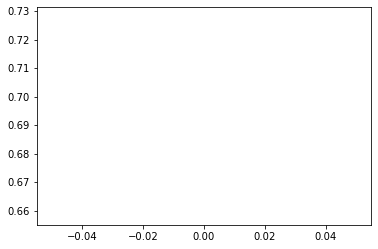

In [131]:
plt.plot(error_list)
plt.show()